## 2) Non-parametric methods

In this section, we are going to use Kaplan-Meier method and log-rank test to analyze the time to event information in the dataset. First, we use the KaplanMeierFitter function to calculate the survival probability with time. The Kaplan-Meier method calculates the probability of survival at time $t$ as:

$$ S(t)=\prod_{i=1}^{t-1}(1-\frac{d_i}{n_i})$$

where $S(t)$ is the probability of survival until time $t$, $d_i$ is the number of units that experienced the event at time $t$, $n_i$ is the number of units at risk of experiencing the event at time $t$. $n_i$ decreases with time, as units experience the event or are censored. $\frac{d_i}{n_i}$ is the probability of experiencing the event at time $i$ and $(1-\frac{d_i}{n_i})$ is the probability of surviving at time $i$. Note that this method does not use any parameters, it only depends on the data on time and censoring.

('Median survival', 28.0)


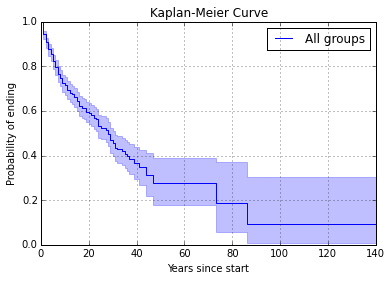

In [8]:
#Create a KaplanMeier object, imported from lifelines
kmf = KaplanMeierFitter()
#Calculate the K-M curve for all groups
kmf.fit(timevar,event_observed = eventvar,label = "All groups")
#Plot the curve and assign labels
kmf.plot()
plt.ylabel('Probability of ending')
plt.xlabel('Years since start')
plt.title('Kaplan-Meier Curve')
#Print median survival time
print('Median survival',kmf.median_)

The median survival time for the groups in the dataset is 28 years. Until about year 45, the probability of survival declines steadily, but in the following period some groups persist until 70 years, and one group survived at least for 140 years (Ku Klux Klan (U.S.)).

Now we can look at the variables in turn and compare different survival curves. We will use a non-parametric method, the log-rank analysis to test the difference. The log-rank test assumes that the hazards of the groups are proportional. Under the null hypothesis, the probability of event across the groups is the same for all time points. To test the null hypothesis, the log-rank test calculates the difference between the observed number of events and the number of events expected in each group proportional to the size of the groups at each time point an event is observed. The log-rank test statistic for group $j$ $(k_{j})$ follows a $\chi^2$ distribution and is calculated as:

$$k_{j} = \frac{(O_{j}-E_{j})^{2}}{var(O_{j}-E_{j})}$$

$O_{j}-E_{j}$ is calculated as:

$$O_{j}-E_{j} = \sum_{i}(o_{ij}-e_{ij})$$ 

and $var(O_{j}-E_{j})$ is:

$$var(O_{j}-E_{j}) = o_{i}\frac{n_{ij}}{n{i}}\Big(1-\frac{n_{ij}}{n{i}}\Big)\frac{(n_{i}-o_{i})}{(n_{i}-1)}$$

$o_{ij}$ is the observed number of events in group $j$ at time $i$ and $e_{ij}$ is the expected number of events in group $j$ at time $i$, which is calculated as $e_{ij} = \frac{n_{ij}}{n_i}{o_{i}}$. Note that $\frac{n_{ij}}{n_i}$ is the proportion of units in group $j$ at risk of event at time $i$ ($n_{ij}$) to the number of units in all groups at risk of event at time $i$ ($n_{i}$) and ${o_{i}}$ is the observed number of events in all groups at time $i$.  

When comparing multiple groups, we first calculate the pairwise log-rank test scores between each of the $k-1$ groups, and write them as a vector of log-rank statistics, $\bf{Z}$ which has $k - 1$ elements. We can leave any of one of the statistics out, because the $k$ covariances are linearly dependent on each other (the sum of log-rank statistics is 0, $\sum k_{j}=0$.

The test statistic for the hypothesis that there is no difference in survival times of $k$ groups is calculated as: 

$$logrankstatistic = \bf{Z} \sideset{_}{^{-1}}\sum \bf{Z}'$$ 

which has a $\chi^2$ distribution, where $\sideset{_}{^{-1}}\sum$ is the inverse of the $k-1$ by $k-1$ variance-covariance matrix of $\bf{Z}$, which has variance of $k_{j}$ on its diagonal elements and $covar(k_{jg})$ on its off-diagonal elements.

The variance of observed number of events in group $j$ is calculated as $var(O_{j}-E_{j})$ as demonstrated above. The covariance between the observed number of events in group $j$ and $g$ is calculated as:

$$covar(k_{jg})=o_{i}\frac{(n_{ij}n_{ig})}{(n_{i}n_{i})}\frac{(n_{i}-o_{i})}{(n_{i}-1)}$$

Note that rejecting the null hypothesis means that the survival times of groups do not come from the same distribution, it does not specify which group's survival time is different. The following plots and test statistics compare the groups in the dataset in terms of the five explanatory variables: operating peak size, economy, regime, type and goal. Astatistically significant log-rank test statistic indicates that we can reject the null hypothesis that time to survival in all groups come from the same distribution.

('Median survival: 10s', 29.0)
('Median survival: 100s', 24.0)
('Median survival: 1,000s', 34.0)
('Median survival: 10,000s', 22.0)
Results
   df: 3
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.10044 |              6.241 |  Cannot Reject Null |       False       


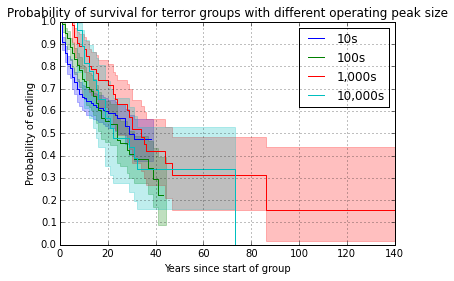

In [9]:
#Create boolean arrays to specify which groups will be included each K-M plot
tens = (survivaldata['10s'] == 1)
hundreds = (survivaldata['100s'] == 1)
thousands = (survivaldata['1,000s'] == 1)
tenthousands = ((survivaldata['10s'] == 0) & (survivaldata['100s'] == 0) & (survivaldata['1,000s'] == 0))
#Start a new plot
plt.figure()
ax = plt.subplot(1,1,1)
#Fit the K-M curve to observations for which Peak Operating Size = 10s
kmf.fit(timevar[tens],event_observed = eventvar[tens],label = "10s")
print('Median survival: 10s',kmf.median_)
plot1 = kmf.plot(ax = ax)
#Fit the K-M curve to observations for which Peak Operating Size = 100s
kmf.fit(timevar[hundreds],event_observed = eventvar[hundreds],label = "100s")
print('Median survival: 100s',kmf.median_)
plot2 = kmf.plot(ax = plot1)
#Fit the K-M curve to observations for which Peak Operating Size = 1,000s
kmf.fit(timevar[thousands],event_observed = eventvar[thousands],label = "1,000s")
print('Median survival: 1,000s',kmf.median_)
plot3 = kmf.plot(ax = plot2)
#Fit the K-M curve to observations for which Peak Operating Size = 10,000s
kmf.fit(timevar[tenthousands],event_observed = eventvar[tenthousands],label = "10,000s")
print('Median survival: 10,000s',kmf.median_)
plot4 = kmf.plot(ax = plot3)
plt.title('Probability of survival for terror groups with different operating peak size')
plt.xlabel('Years since start of group')
plt.ylabel('Probability of ending')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(terrordata['Time'],terrordata['Operating Peak Size'],terrordata['Ended'],alpha = 0.95)
twoplusgroups_logrank.print_summary()

The log-rank statistic does not reject the null hypothesis that at least one group's hazard is different than the others at least for some time. However, the median survival times and the difference between the survival curves indicate that the groups with different peak size groups might indeed have different hazard of ending. This discrepancy between the log-rank test result and the plots might be caused by the violation of the proportional hazards assumption: the ratio between the hazards (not survival times) of different groups are not constant during the observed time period. It is possible to look at a plot of $log(-log(S(t)))$ vs. $log(t)$ and see if the curves are parallel to each other to see whether the hazards are proportional (see section 3). As we will see later, the curves for $log(-(log(S(t)))$ vs. $log(t)$ indeed cross each other for groups with different peak operating sizes. This might be the reason why the log-rank test did not detect a difference. Note that the log-rank test compares the differences between the obseved and expected events. Even though the survival curves are different (as seen in the plot above) the total observed of events might be close to the expected number of events (for example, one group might have more events in one time period but fewer events in the following time period) reducing the power of the log-rank statistic to detect differences. 

('Median survival: Low income', 30.0)
('Median survival: Lower middle income', 30.0)
('Median survival: Upper middle income', 20.0)
('Median survival: High income', 27.0)
Results
   df: 3
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.06813 |              7.121 |  Cannot Reject Null |       False       


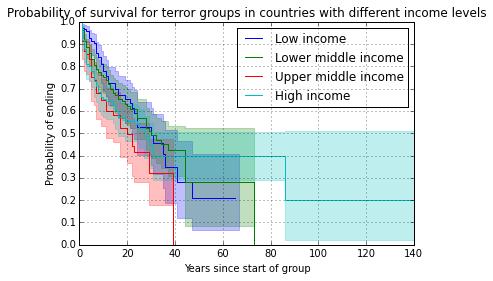

In [10]:
#Create boolean arrays to specify which groups will be included each K-M plot
low = (survivaldata['Low_income'] == 1)
lowermiddle = (survivaldata['Lower_middle_income'] == 1)
uppermiddle = (survivaldata['Upper_middle_income'] == 1)
high = ((survivaldata['Low_income'] == 0) & (survivaldata['Lower_middle_income'] == 0) & (survivaldata['Upper_middle_income'] == 0))
#Start a new plot
plt.figure()
ax = plt.subplot(1,1,1)
#Fit the K-M curve to observations for which Economy = low
kmf.fit(timevar[low],event_observed = eventvar[low],label = "Low income")
print('Median survival: Low income',kmf.median_)
plot1 = kmf.plot(ax = ax)
#Fit the K-M curve to observations for which Economy = Lower middle income
kmf.fit(timevar[lowermiddle],event_observed = eventvar[lowermiddle],label = "Lower middle income")
print('Median survival: Lower middle income',kmf.median_)
plot2 = kmf.plot(ax = plot1)
#Fit the K-M curve to observations for which Economy = Upper middle income
kmf.fit(timevar[uppermiddle],event_observed = eventvar[uppermiddle],label = "Upper middle income")
print('Median survival: Upper middle income',kmf.median_)
plot3 = kmf.plot(ax = plot2)
#Fit the K-M curve to observations for which Economy = High income
kmf.fit(timevar[high],event_observed = eventvar[high],label = "High income")
print('Median survival: High income',kmf.median_)
plot4 = kmf.plot(ax = plot3)
plt.title('Probability of survival for terror groups in countries with different income levels')
plt.xlabel('Years since start of group')
plt.ylabel('Probability of ending')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(terrordata['Time'],terrordata['Econ.'],terrordata['Ended'],alpha = 0.95)
twoplusgroups_logrank.print_summary()

The log-rank test does not reject the null hypothesis that survival time distributions do not differ by the income level of the country. However, the p-value is quite close to our significance cutoff value of 0.05 and the plots and the median survival times suggest that terrorist groups operating against low income countries last longer than those fighting against upper middle income countries. In section 3, we will see that the proportional hazards assumption for groups operating in countries with different income is not met. This might be the reason why the test failed to detect the difference between the hazards.

('Median survival: Free', 27.0)
('Median survival: Partly Free', 29.0)
('Median survival: Not Free', 28.0)
Results
   df: 2
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.52727 |              1.280 |  Cannot Reject Null |       False       


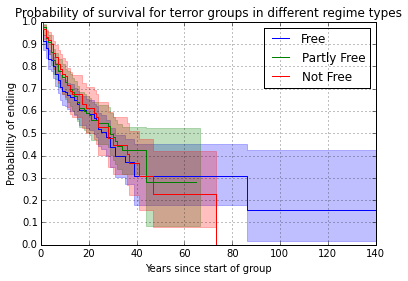

In [11]:
#Create boolean arrays to specify which groups will be included each K-M plot
free = (survivaldata['Free'] == 1)
partlyfree = (survivaldata['Partly_free'] == 1)
notfree = ((survivaldata['Free'] == 0) & (survivaldata['Partly_free'] == 0))
#Start a new plot
plt.figure()
ax = plt.subplot(1,1,1)
#Fit the K-M curve to observations for which regime = Free
kmf.fit(timevar[free],event_observed = eventvar[free],label = "Free")
print('Median survival: Free',kmf.median_)
plot1 = kmf.plot(ax = ax)
#Fit the K-M curve to observations for which regime = Partly_free
kmf.fit(timevar[partlyfree],event_observed = eventvar[partlyfree],label = "Partly Free")
print('Median survival: Partly Free',kmf.median_)
plot2 = kmf.plot(ax = plot1)
#Fit the K-M curve to observations for which regime = Not_free
kmf.fit(timevar[notfree],event_observed = eventvar[notfree],label = "Not Free")
print('Median survival: Not Free',kmf.median_)
kmf.plot(ax = plot2)
plt.title('Probability of survival for terror groups in different regime types')
plt.xlabel('Years since start of group')
plt.ylabel('Probability of ending')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(terrordata['Time'],terrordata['Regime'],terrordata['Ended'],alpha = 0.95)
twoplusgroups_logrank.print_summary()

An interesting result is that the survival times of groups under different regimes are not statistically different from each other. The plots indicate that the survival times of groups under free, partly-free and non-free regimes are very similar. Until about 23 years, it looks like the groups operating against free regimes have a shorter survival duration, but the different is too small to be declared as significant, and effectively disappears after year 23. The plot also suggests that the survival times of groups under partly-free and non-free regimes are very similar. Please note that looking at the plots like this does not allow for controlling for different group characteristics at the same time. Semi-parametric (section 3) or parametric (section 4) methods are necessary to control for the variables in the dataset. 

('Median survival: Nationalist', 30.0)
('Median survival: Religious', inf)
('Median survival: Right wing', 9.0)
('Median survival: Left wing', 20.0)
Results
   df: 3
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00000 |             38.592 |      Reject Null    |        True       


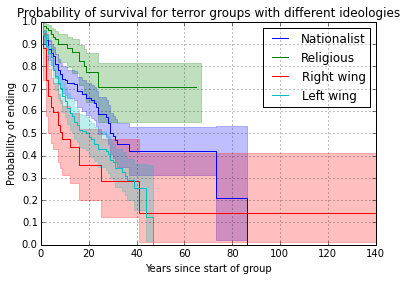

In [12]:
#Create boolean arrays to specify which groups will be included each K-M plot
nationalist = (survivaldata['Nationalist'] == 1)
religious = (survivaldata['Religious'] == 1)
right_wing = (survivaldata['Right_wing'] == 1)
left_wing = ((survivaldata['Nationalist'] == 0) & (survivaldata['Religious'] == 0) & (survivaldata['Right_wing'] == 0))
#Start a new plot
plt.figure()
ax = plt.subplot(1,1,1)
#Fit the K-M curve to observations for which Type = Nationalist
kmf.fit(timevar[nationalist],event_observed = eventvar[nationalist],label = "Nationalist")
print('Median survival: Nationalist',kmf.median_)
plot1 = kmf.plot(ax = ax)
#Fit the K-M curve to observations for which Type = Religious
kmf.fit(timevar[religious],event_observed = eventvar[religious],label = "Religious")
print('Median survival: Religious',kmf.median_)
plot2 = kmf.plot(ax = plot1)
#Fit the K-M curve to observations for which Type = Right_wing
kmf.fit(timevar[right_wing],event_observed = eventvar[right_wing],label = "Right wing")
print('Median survival: Right wing',kmf.median_)
plot3 = kmf.plot(ax = plot2)
#Fit the K-M curve to observations for which Type = Left_wing
kmf.fit(timevar[left_wing],event_observed = eventvar[left_wing],label = "Left wing")
print('Median survival: Left wing',kmf.median_)
plot4 = kmf.plot(ax = plot3)
plt.title('Probability of survival for terror groups with different ideologies')
plt.xlabel('Years since start of group')
plt.ylabel('Probability of ending')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(terrordata['Time'],terrordata['Type'],terrordata['Ended'],alpha = 0.95)
twoplusgroups_logrank.print_summary()

Log-rank statistic indicates that groups with different ideologies have different survival times. From the plot it looks like religious groups last longer than right wing groups in general. One exception is the Ku Klux Klan, which has survived for at least 140 years. Note that the median survival time for religious groups is 'infinity' since we do not observe the median survival time for these groups in the dataset.

('Median survival: Territorial change', 37.0)
('Median survival: Policy change', 29.0)
('Median survival: Empire', 73.0)
('Median survival: Social revolution', 20.0)
('Median survival: Status_Quo', 12.0)
('Median survival: Regime change', 21.0)
Results
   df: 5
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00078 |             21.087 |      Reject Null    |        True       


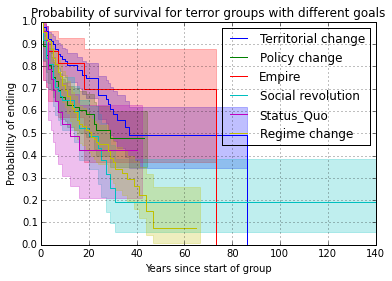

In [13]:
#Create boolean arrays to specify which groups will be included each K-M plot
territorial = (survivaldata['Territorial_change'] == 1)
policy = (survivaldata['Policy_change'] == 1)
empire = (survivaldata['Empire'] == 1)
social = (survivaldata['Social_revolution'] == 1)
status = (survivaldata['Status_Quo'] == 1)
regime = (survivaldata['Territorial_change'] == 0) & (survivaldata['Policy_change'] == 0) & (survivaldata['Empire'] == 0) & (survivaldata['Social_revolution'] == 0) & (survivaldata['Status_Quo'] == 0)
#Start a new plot
plt.figure()
ax = plt.subplot(1,1,1)
#Fit the K-M curve to observations for which Goal = Territorial_change
kmf.fit(timevar[territorial],event_observed = eventvar[territorial],label = "Territorial change")
print('Median survival: Territorial change',kmf.median_)
plot1 = kmf.plot(ax = ax)
#Fit the K-M curve to observations for which Goal = Policy_change
kmf.fit(timevar[policy],event_observed = eventvar[policy],label = "Policy change")
print('Median survival: Policy change',kmf.median_)
plot2 = kmf.plot(ax = plot1)
#Fit the K-M curve to observations for which Goal = Empire
kmf.fit(timevar[empire],event_observed = eventvar[empire],label = "Empire")
print('Median survival: Empire',kmf.median_)
plot3 = kmf.plot(ax = plot2)
#Fit the K-M curve to observations for which Goal = Social_revolution
kmf.fit(timevar[social],event_observed = eventvar[social],label = "Social revolution")
print('Median survival: Social revolution',kmf.median_)
plot4 = kmf.plot(ax = plot3)
#Fit the K-M curve to observations for which Goal = Status Quo
kmf.fit(timevar[status],event_observed = eventvar[status],label = "Status_Quo")
print('Median survival: Status_Quo',kmf.median_)
plot5 = kmf.plot(ax = plot4)
#Fit the K-M curve to observations for which Goal = Regime_change
kmf.fit(timevar[regime],event_observed = eventvar[regime],label = "Regime change")
print('Median survival: Regime change',kmf.median_)
plot6 = kmf.plot(ax = plot5)
plt.title('Probability of survival for terror groups with different goals')
plt.xlabel('Years since start of group')
plt.ylabel('Probability of ending')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(terrordata['Time'],terrordata['Goal'],terrordata['Ended'],alpha = 0.95)
twoplusgroups_logrank.print_summary()

It looks like there is a statistically significant difference between the survival times of groups with different goals. The K-M plots suggest that groups that aim for territorial change or an empire last longer than those who aim for the status quo.

K-M plots and log-rank test are widely used for comparison of survival data. However, looking only at K-M curves might be misleading, since we are not controlling for other factors when calculating the survival probabilities. Log-rank test assumes that the hazards are proportional, and when this assumption does not hold, the test might not detect the differences between the groups. We next turn to Cox proportional hazards model, a semi-parametric method that allows for controlling for different covariates. We will also analyze residuals and use log-log plots to assess the proportionality of hazards assumption.